In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [7]:
data = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = data.load_data('../shot-by-cops/mnist.npz')

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1108)

In [17]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)



Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2662 - accuracy: 0.9217
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1080 - accuracy: 0.9669
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0732 - accuracy: 0.9769


In [18]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0974 - accuracy: 0.9697
0.09744031727313995 0.9696999788284302


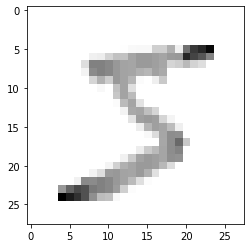

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [19]:
import matplotlib.pyplot as plt


plt.imshow(x_train[0], cmap= plt.cm.binary)
plt.show()
print(x_train[0])


In [20]:
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [21]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [22]:
predictions = new_model.predict(x_test)

In [33]:
print(np.argmax(predictions[1]))

2


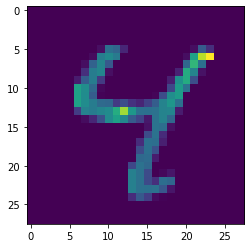

In [39]:
plt.imshow(x_test[6])
plt.show()